In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore') # игнорировать предупреждения

In [2]:
df = pd.read_csv('tips.xls')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.total_bill.max()

50.81

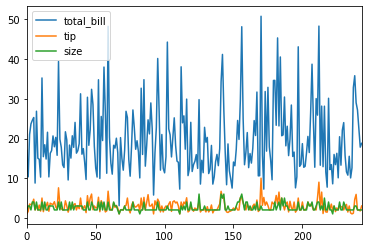

In [4]:
df.plot()

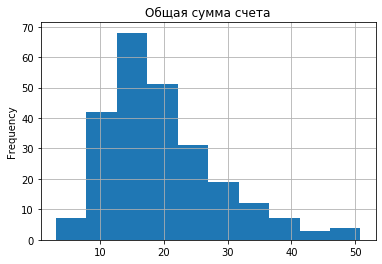

In [5]:
df.total_bill.plot(kind='hist', grid=True, title='Общая сумма счета')

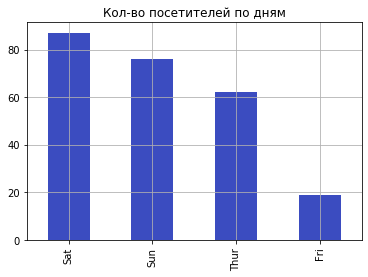

In [6]:
df['day'].value_counts().plot(kind='bar', 
                              grid=True, 
                              colormap='coolwarm',
                              title='Кол-во посетителей по дням')

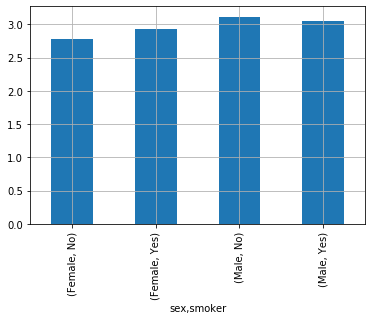

In [7]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F82E470E48>,
      dtype=object)

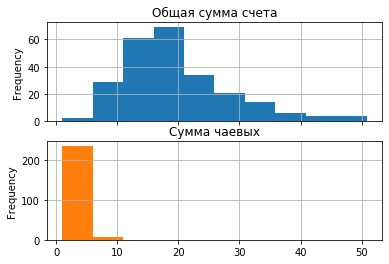

In [8]:
df[['total_bill', 'tip']].plot(kind='hist',
                               grid=True,
                               subplots=True,
                               title=['Общая сумма счета', 'Сумма чаевых'],
                               legend=False)

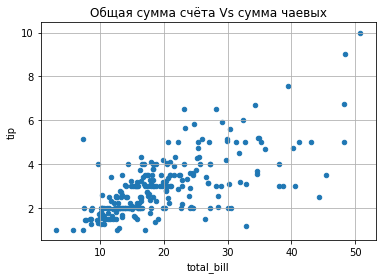

In [9]:
df.plot(kind='scatter',
        x='total_bill',
        y='tip',
        grid=True,
        title='Общая сумма счёта Vs сумма чаевых')

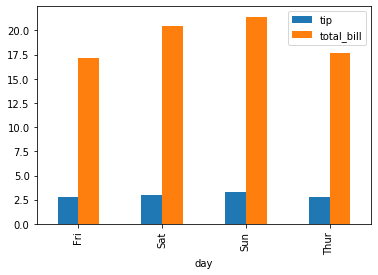

In [10]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

Text(0.5, 0, 'Сумма заказа, USD')

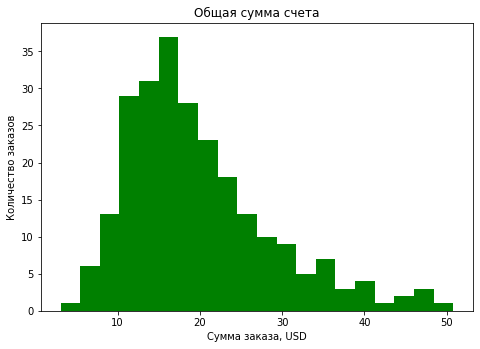

In [11]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins=20, color='green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

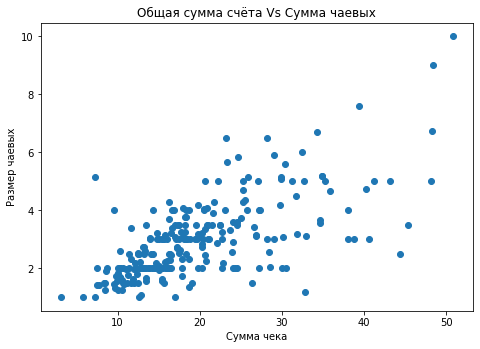

In [12]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=df['total_bill'], y=df['tip'], marker='o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

In [13]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

In [14]:
tips_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

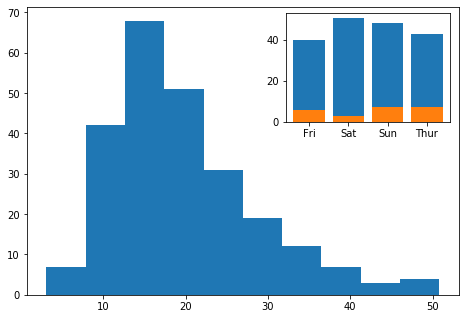

In [15]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

<BarContainer object of 4 artists>

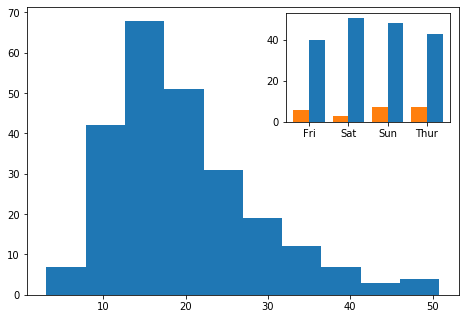

In [16]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

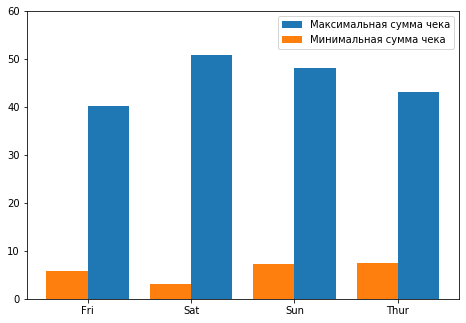

In [17]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
         width = 0.4, align = 'edge', label='Максимальная сумма чека')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
         width = -0.4, align = 'edge', label='Минимальная сумма чека')
axes.legend(loc=1)

Text(0.5, 1.0, 'Общая сумма счета VS Сумма чаевых')

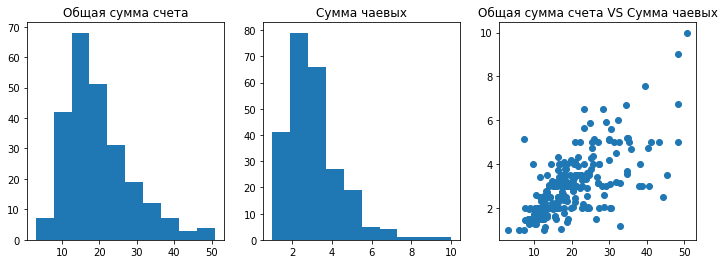

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x=df['total_bill'], y=df['tip'], marker='o')
axes[2].set_title('Общая сумма счета VS Сумма чаевых')

In [19]:
import numpy as np

In [20]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

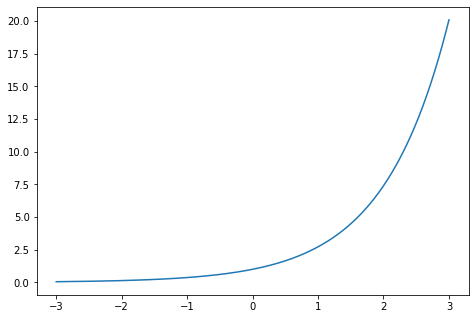

In [21]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

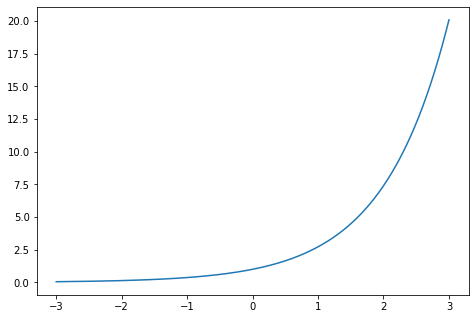

In [22]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1)

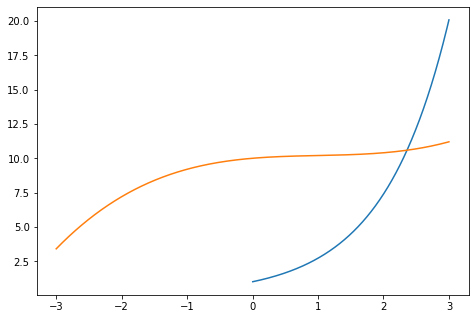

In [23]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

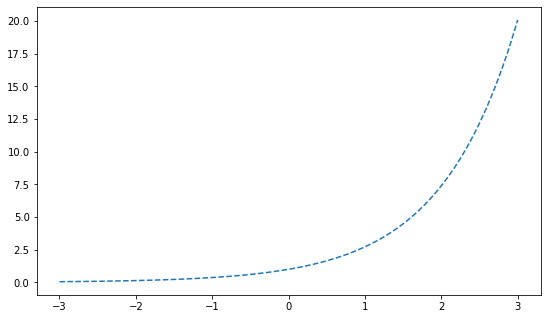

In [24]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

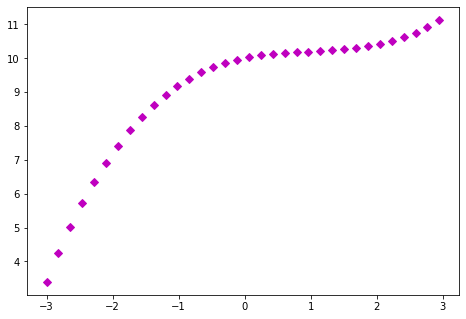

In [25]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

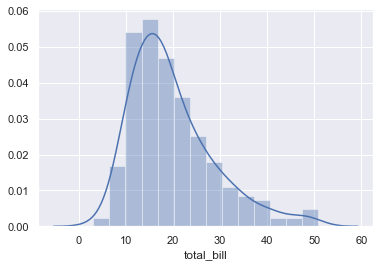

In [28]:
sns.set()
sns.distplot(df['total_bill'])

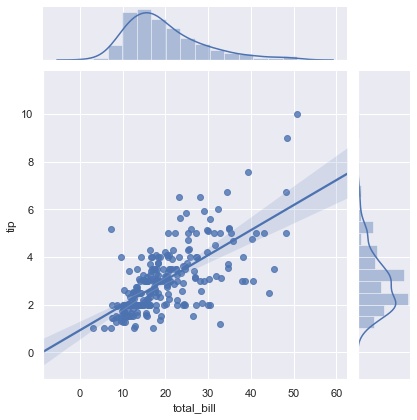

In [34]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

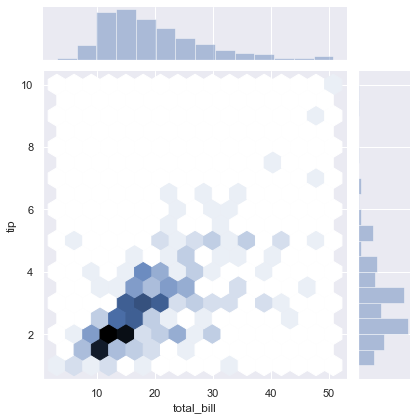

In [37]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex')

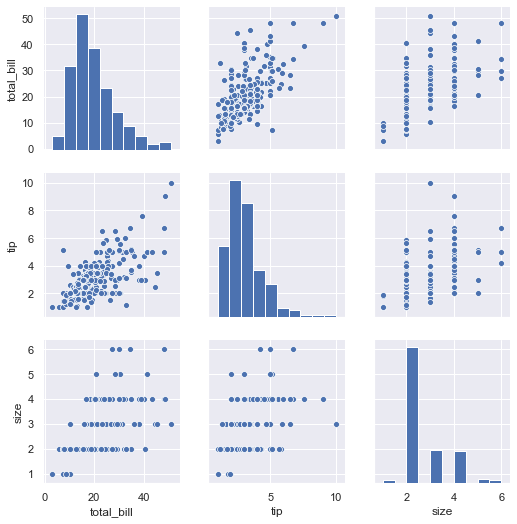

In [31]:
sns.pairplot(df)

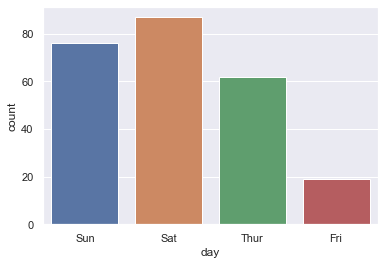

In [39]:
sns.countplot(x='day', data=df)

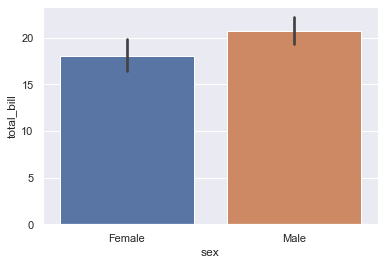

In [45]:
sns.barplot(x='sex', y='total_bill', data=df)

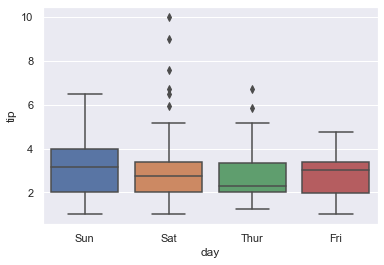

In [52]:
sns.boxplot(x='day', y='tip', data=df)

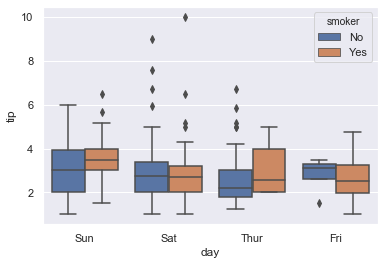

In [54]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

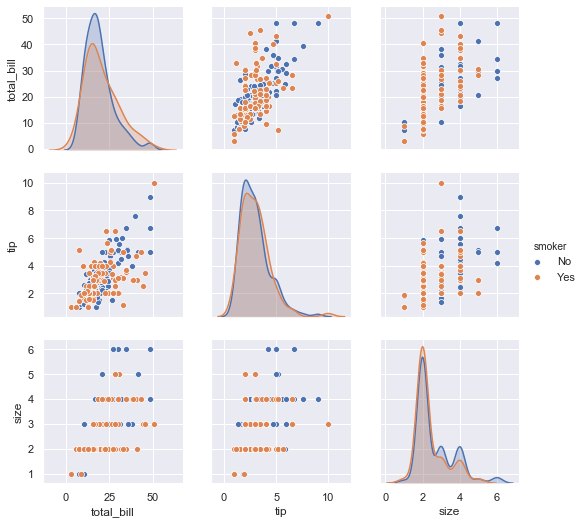

In [55]:
sns.pairplot(df, hue = 'smoker')

In [56]:
correlation = df.corr()

In [57]:
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


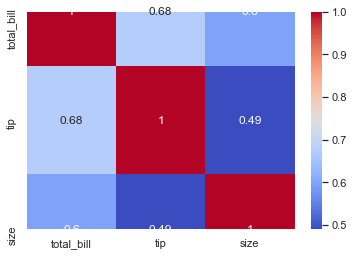

In [59]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [62]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [63]:
df.iplot()

In [65]:
df[['total_bill', 'tip']].iplot(kind='spread')

In [67]:
df.iplot(kind='bubble', x='total_bill', y='size', size='tip')